In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/merged_hourly_load_weather (1).csv')

In [3]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

In [4]:
df.head()

,load,temperature_2m,relative_humidity_2m,precipitation,windspeed_10m,winddirection_10m,cloudcover,pressure_msl,dew_point_2m
datetime,,,,,,,,,
2018-01-01 00:00:00,20905.32,11.4,81,0.0,1.9,22,0,1014.5,8.3
2018-01-01 01:00:00,18827.25,9.5,88,0.0,9.5,245,0,1014.5,7.5
2018-01-01 02:00:00,17624.49,8.6,88,0.0,6.0,253,0,1013.8,6.8
2018-01-01 03:00:00,17092.84,8.2,88,0.0,7.3,261,0,1013.5,6.3
2018-01-01 04:00:00,17661.66,7.9,88,0.0,8.0,275,0,1013.3,6.0


In [5]:
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month
df["day_of_month"] = df.index.day
df["day_of_year"] = df.index.day_of_year
df["year"] = df.index.year
df["week_of_year"] = df.index.isocalendar().week.astype("int64")
df.head()

,load,temperature_2m,relative_humidity_2m,precipitation,windspeed_10m,winddirection_10m,cloudcover,pressure_msl,dew_point_2m,hour,dayofweek,month,day_of_month,day_of_year,year,week_of_year
datetime,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,20905.32,11.4,81,0.0,1.9,22,0,1014.5,8.3,0,0,1,1,1,2018,1
2018-01-01 01:00:00,18827.25,9.5,88,0.0,9.5,245,0,1014.5,7.5,1,0,1,1,1,2018,1
2018-01-01 02:00:00,17624.49,8.6,88,0.0,6.0,253,0,1013.8,6.8,2,0,1,1,1,2018,1
2018-01-01 03:00:00,17092.84,8.2,88,0.0,7.3,261,0,1013.5,6.3,3,0,1,1,1,2018,1
2018-01-01 04:00:00,17661.66,7.9,88,0.0,8.0,275,0,1013.3,6.0,4,0,1,1,1,2018,1


In [6]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 116.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 114.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 121.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.0 MB/s eta 0:00:00


In [7]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
threshold_date_1 = "01-01-2024"
threshold_date_2 = "01-01-2025"

In [9]:
train_data = df.loc[df.index < threshold_date_1]
test_data = df.loc[(df.index >= threshold_date_1) & (df.index < threshold_date_2)]
hold_out_data = df.loc[df.index >= threshold_date_2]

In [66]:
# Load the pre-trained model from the central server
global_model = load_model("/content/deeplstm.keras")

In [67]:
FEATURES = ["hour", "day_of_month", "dayofweek", "day_of_year", "month", "year", "week_of_year", "temperature_2m", "relative_humidity_2m",	"windspeed_10m", "dew_point_2m"]
TARGET = "load"
FEATURES_TARGET = FEATURES.copy()
FEATURES_TARGET.append(TARGET)
train_data_keras = test_data[FEATURES_TARGET]
test_data_keras = hold_out_data[FEATURES_TARGET]

scaler = MinMaxScaler(feature_range=(0, 1))
train_data_keras_s = scaler.fit_transform(train_data_keras.values)
test_data_keras_s = scaler.transform(test_data_keras.values)

X_train_keras = train_data_keras_s[:, :-1].reshape(train_data_keras_s.shape[0], 1, len(FEATURES))
y_train_keras = train_data_keras_s[:, -1]
X_test_keras = test_data_keras_s[:, :-1].reshape(test_data_keras_s.shape[0], 1, len(FEATURES))
y_test_keras = test_data_keras_s[:, -1]

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

def create_lstm_model(input_shape):
    model = Sequential()

    # First LSTM layer
    model.add(LSTM(units=256, activation='tanh', input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.5))

    # Second LSTM layer
    model.add(LSTM(units=128, activation='tanh', return_sequences=True))
    model.add(Dropout(0.5))

    # Third LSTM layer
    model.add(LSTM(units=32, activation='tanh', return_sequences=False))
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(units=1))  # For regression

    model.compile(optimizer='adam', loss='mae')
    return model

In [69]:
early_stopping = EarlyStopping(monitor='val_loss', patience=8, mode='min')
model_checkpoint = ModelCheckpoint('fed_model.keras', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5,
    verbose=0,
    mode='min'
)

In [70]:
def split_data_among_clients(X, y, num_clients):
    split_size = len(X) // num_clients
    client_data = []
    for i in range(num_clients):
        start = i * split_size
        end = (i+1) * split_size if i != num_clients-1 else len(X)
        client_data.append((X[start:end], y[start:end]))
    return client_data

In [71]:
def aggregate_weights(weights_list):
    avg_weights = []
    for weights in zip(*weights_list):
        avg_weights.append(np.mean(weights, axis=0))
    return avg_weights

In [72]:
num_clients = 1
client_data = split_data_among_clients(X_train_keras, y_train_keras, num_clients)

num_rounds = 2 # Number of federated rounds
global_weights = global_model.get_weights()

In [73]:
epochs = 50
Input_shape=(X_train_keras.shape[1], X_train_keras.shape[2])
def federated_finetune(client_data, global_model):
    client_weights = []

    for client_idx in range(num_clients):
        # Create a local model based on the pre-trained global model
        local_model = tf.keras.models.clone_model(global_model)
        local_model.set_weights(global_model.get_weights())  # Load global model weights

        # Fine-tune the local model on the client's local data
        X_client, y_client = client_data[client_idx]
        # Compile the model
        local_model=create_lstm_model(Input_shape)
        local_model.fit(X_client, y_client, epochs=epochs, batch_size=32, validation_data=(X_test_keras, y_test_keras), callbacks=[early_stopping, model_checkpoint, reduce_lr_loss])

        # Collect the fine-tuned weights for aggregation
        client_weights.append(local_model.get_weights())

    return client_weights

In [76]:
def update_global_model(client_weights, global_model):
    # Aggregate client weights to update the global model incrementally
    global_weights = global_model.get_weights()

    global_model.set_weights(client_weights[0])

    return global_model

In [77]:
for round_num in range(num_rounds):
    print(f"Federated Learning Round {round_num + 1}/{num_rounds}")

    # Fine-tune locally on each client and update global model
    client_weights = federated_finetune(client_data, global_model)

    # Update the global model with the fine-tuned weights
    global_model = update_global_model(client_weights, global_model)

Federated Learning Round 1/2
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.1963 - val_loss: 0.1200 - learning_rate: 0.0010
Epoch 2/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1171 - val_loss: 0.1177 - learning_rate: 0.0010
Epoch 3/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1088 - val_loss: 0.1149 - learning_rate: 0.0010
Epoch 4/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1083 - val_loss: 0.1137 - learning_rate: 0.0010
Epoch 5/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1003 - val_loss: 0.1201 - learning_rate: 0.0010
Epoch 6/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0967 - val_loss: 0.1153 - learning_rate: 0.0010
Epoch 7/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0949 - val_loss: 0.1191 - learning_rate: 0.0010
Epoch 8/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0934 - val_loss: 0.1104 - learning_rate: 0.0010
Epoch 9/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0936 - val_loss: 0.1063 - learning_rate: 0.0010
Epoch 10/50
256/256 

In [78]:
# 1. Predict using the initial (global) model
pred_lstm = global_model.predict(X_test_keras)

# 2. Prepare results for inverse scaling
results_lstm = test_data_keras_s.copy()
results_lstm[:, -1] = pred_lstm.reshape(-1)  # Replace the target column with predictions

# 3. Inverse transform
results_lstm_unscaled = scaler.inverse_transform(results_lstm)

# 4. Create result dataframe
result_frame_lstm = pd.DataFrame(index=hold_out_data.index)  # Use test_data's index
result_frame_lstm["actual_load"] = hold_out_data["load"].values
result_frame_lstm["predicted_load"] = results_lstm_unscaled[:, -1]

# 5. Calculate Metrics
mape_lstm = np.mean(np.abs((result_frame_lstm["actual_load"] - result_frame_lstm["predicted_load"]) / result_frame_lstm["actual_load"])) * 100
rmse_lstm = np.sqrt(np.mean(np.square(result_frame_lstm["actual_load"] - result_frame_lstm["predicted_load"])))

# 6. Print Metrics
print(f"MAPE of Fed Model: {mape_lstm:.2f}%")
print(f"RMSE of Fed Model: {rmse_lstm:.2f} MW")

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
MAPE of Fed Model: 6.66%
RMSE of Fed Model: 3199.55 MW


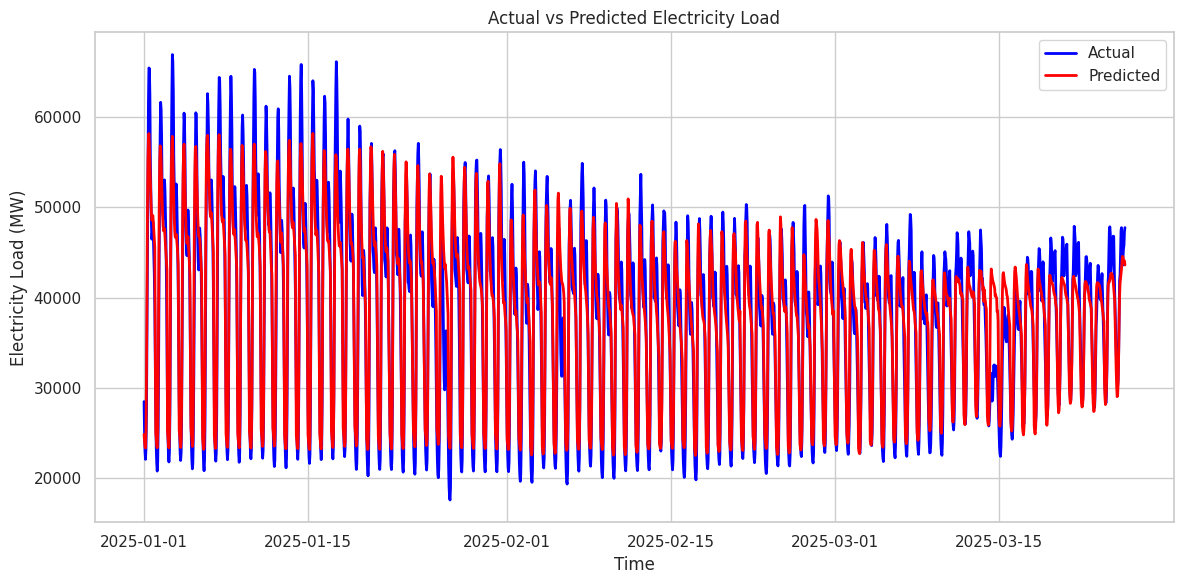

In [79]:
import seaborn as sns
from matplotlib import rcParams  # Import rcParams
import matplotlib.pyplot as plt
# Set general plot aesthetics
sns.set(style="whitegrid")
rcParams['figure.figsize'] = 15, 6

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot Actual vs Predicted using seaborn styling
ax.plot(result_frame_lstm.index, result_frame_lstm['actual_load'], label='Actual', color='blue', linewidth=2)
ax.plot(result_frame_lstm.index, result_frame_lstm['predicted_load'], label='Predicted', color='red', linewidth=2)

# Customize axes
ax.set_xlabel("Time")
ax.set_ylabel("Electricity Load (MW)")
ax.set_title("Actual vs Predicted Electricity Load")
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
global_model.save('federated.keras')

In [80]:
FEATURES = ["hour", "day_of_month", "dayofweek", "day_of_year", "month", "year", "week_of_year", "temperature_2m", "relative_humidity_2m",	"windspeed_10m", "dew_point_2m"]
TARGET = "load"
FEATURES_TARGET = FEATURES.copy()
FEATURES_TARGET.append(TARGET)
train_data_keras = train_data[FEATURES_TARGET]
test_data_keras = test_data[FEATURES_TARGET]

scaler = MinMaxScaler(feature_range=(0, 1))
train_data_keras_s = scaler.fit_transform(train_data_keras.values)
test_data_keras_s = scaler.transform(test_data_keras.values)

X_train_keras = train_data_keras_s[:, :-1].reshape(train_data_keras_s.shape[0], 1, len(FEATURES))
y_train_keras = train_data_keras_s[:, -1]
X_test_keras = test_data_keras_s[:, :-1].reshape(test_data_keras_s.shape[0], 1, len(FEATURES))
y_test_keras = test_data_keras_s[:, -1]

In [81]:
# Load the pre-trained model from the central server
globe = load_model("/content/deeplstm.keras")

In [82]:
# 1. Predict using the initial (global) model
pred_lstm = globe.predict(X_test_keras)

# 2. Prepare results for inverse scaling
results_lstm = test_data_keras_s.copy()
results_lstm[:, -1] = pred_lstm.reshape(-1)  # Replace the target column with predictions

# 3. Inverse transform
results_lstm_unscaled = scaler.inverse_transform(results_lstm)

# 4. Create result dataframe
result_frame_lstm = pd.DataFrame(index=test_data.index)  # Use test_data's index
result_frame_lstm["actual_load"] = test_data["load"].values
result_frame_lstm["predicted_load"] = results_lstm_unscaled[:, -1]

# 5. Calculate Metrics
mape_lstm = np.mean(np.abs((result_frame_lstm["actual_load"] - result_frame_lstm["predicted_load"]) / result_frame_lstm["actual_load"])) * 100
rmse_lstm = np.sqrt(np.mean(np.square(result_frame_lstm["actual_load"] - result_frame_lstm["predicted_load"])))

# 6. Print Metrics
print(f"MAPE of Fed Model: {mape_lstm:.2f}%")
print(f"RMSE of Fed Model: {rmse_lstm:.2f} MW")

256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
MAPE of Fed Model: 8.35%
RMSE of Fed Model: 5639.31 MW


In [83]:
result_frame_lstm.index = pd.to_datetime(result_frame_lstm.index)
last_date = result_frame_lstm.index[-1]

day_data = result_frame_lstm.loc['2024-05-01':'2024-05-01 23:59:59']
week_data = result_frame_lstm.loc[pd.to_datetime("2024-05-01"):pd.to_datetime("2024-05-07")]
month_data = result_frame_lstm.loc[pd.to_datetime("2024-12-01"):pd.to_datetime("2024-12-31")]

In [84]:
def plot_forecast(df, title):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df.index, df['actual_load'], label='Actual', color='blue', linewidth=2)
    ax.plot(df.index, df['predicted_load'], label='Predicted', color='red', linewidth=2)
    ax.set_xlabel("Time")
    ax.set_ylabel("Electricity Load (MW)")
    ax.set_title(title)
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()


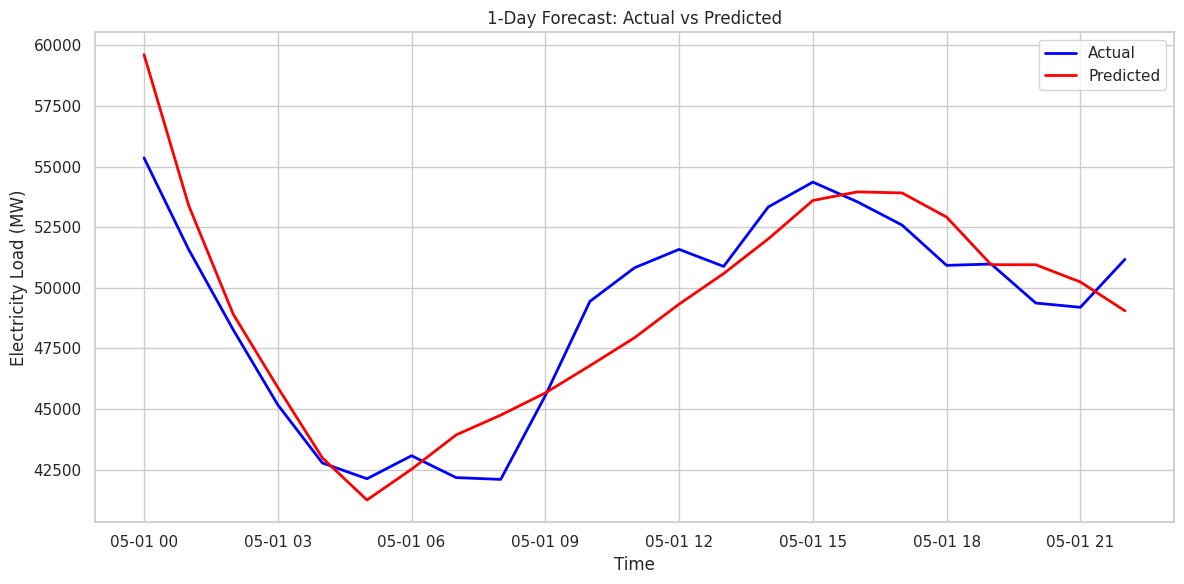

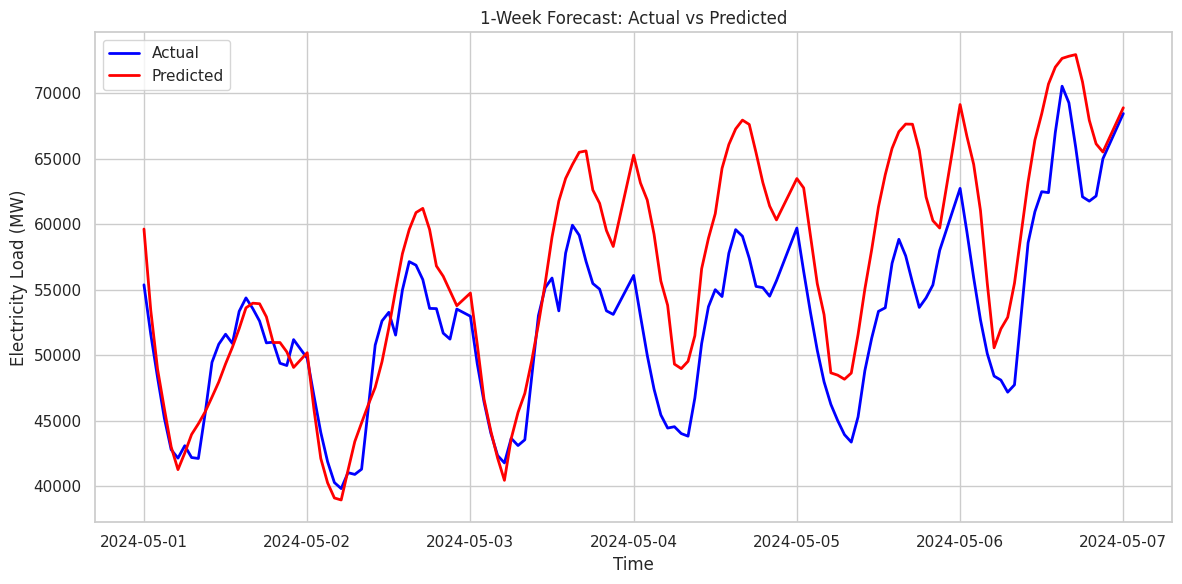

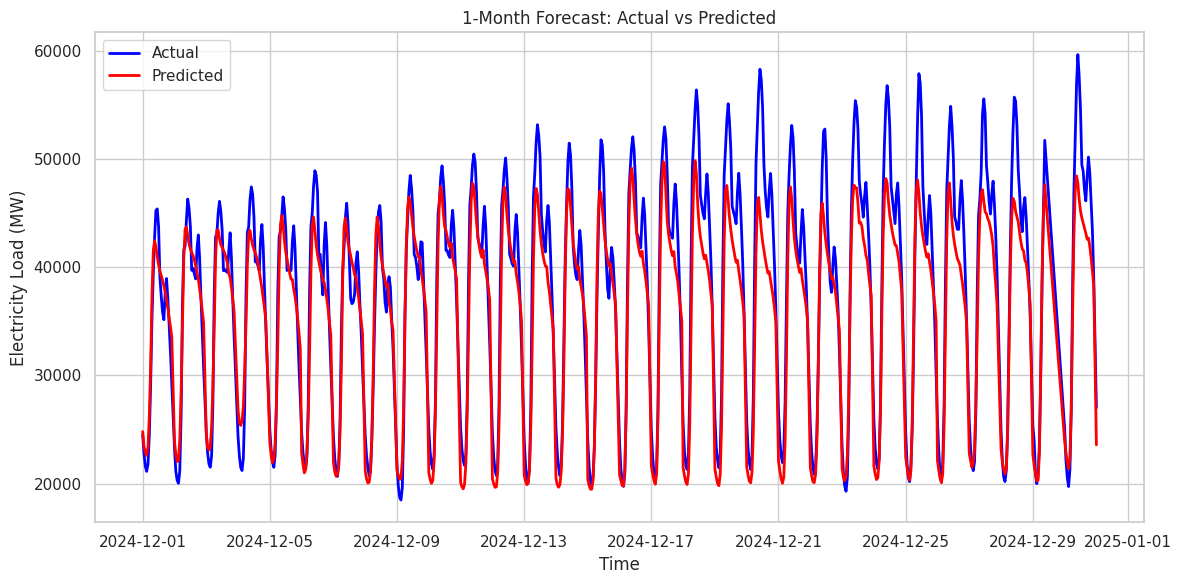

In [85]:
plot_forecast(day_data, "1-Day Forecast: Actual vs Predicted")
plot_forecast(week_data, "1-Week Forecast: Actual vs Predicted")
plot_forecast(month_data, "1-Month Forecast: Actual vs Predicted")